# Plot sunspot data
This notebook illustrates some techniques that are useful for plotting scientfic data. In particular, we show how to deal with CSV files that are not formatted exactly as expected. We also import matplotlib.pyplot so that we can create plots that are written to an external file. 

The data set to be used is the CSV file of monthly sunspot data from 
http://www.sidc.be/silso/datafiles
Note that this site also has descriptions of the data. 

Before starting, download the data and save the CSV file to your working folder. 

Start by importing warnings and pandas, and the command to allow matplotlib to work inline. Note also that we are importing matplotlib.pyplot as plt, as this provides a way to generate a plot in an external file (as we might want for inclusion in a report). 

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline

The CSV file has two peculiarities that we have to deal with. Firstly, it has no header row, and secondly it uses a semi-colon rather than a comma as the column delimiter. The read_csv function has optional parameters that can be used to ensure that it works correctly with such data. 

For a file with no header, we use the parameter header set to None. We define the column names in a list, using the parameter names as shown below. Before calling read_csv we define the list of parameter names.  

In [2]:
colnames=['Year','Month','Year (fraction)','Sunspot number','Std dev.','N obs.','Provisional']
ssdata=read_csv('SN_m_tot_V2.0.csv',sep=';',header=None,names=colnames)

Now that the data are read into the frame, we can check that entries are as we expect, for instance

In [3]:
ssdata.iloc[0]

Year               1749.000
Month                 1.000
Year (fraction)    1749.042
Sunspot number       96.700
Std dev.             -1.000
N obs.               -1.000
Provisional           1.000
Name: 0, dtype: float64

The next stage is to plot these data. We use the pandas DataFrame.plot() function, but with additional parameters. Note how we can specify which columns to plot in the x- and y- directions, and change the range of the y-axis scale using ylim. 

The function DataFrame.plot() does more than generate the plot, it returns an object that specifies the plot. This retuned object is a class of matplotlib called Axes, and we use it to allow detailed changes to the plot. We do this using the Axes.set() function that allows the x- and y-axis labels to be specified. This example also shows how the title can be changed. 

Finally, we use Axes.get_figure() to save the figure. 


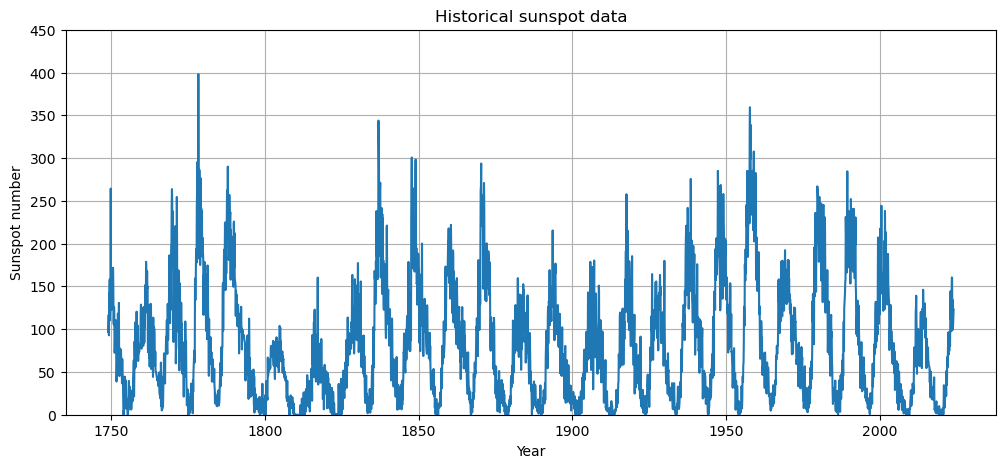

In [4]:
ax=ssdata.plot(x='Year (fraction)', y='Sunspot number',grid=True,legend=False,ylim=[0,450],figsize=(12,5))
ax.set(xlabel="Year", ylabel="Sunspot number", title="Historical sunspot data")
fig=ax.get_figure()

The final step is to write the figure out to an external file. Note that savefig() will generate a file according to the file extension that is specified, and that .png, .pdf and .jpg images are all supported. 

In [5]:
fig.savefig('SunspotChart.png')

##Futher information
More on pandas read_csv() is available at
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

More on pandas DataFrame.plot()
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

More on matplotlib in general 
http://matplotlib.org/index.html